## Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Data Science/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Soal

### Categorical Data Encoding

pada kolom PaymentMethod, InternetService, OnlineSecurity, Contract <br><br>

lakukan Categorical Data Encoding, dari 4 kolom tersebut wajib 1 kolom menggunakan frequency encoding, 1 kolom mean encoding, dan sisa nya bebas.<br><br>

kemudian setelah dilakukan proses Categorical Data Encoding, gabungkan dengan data awal

### **MEAN TARGET ENCODING [Payment Method]**

In [5]:
# Find out the unique value / categorical data of PaymentMethod
# Because the categorical data is more than 3 and it is a nominal data, so the right method is using mean target encoding
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [6]:
# Calculate the frequency of category in the dataset
Freq_PM = data['PaymentMethod'].value_counts().reset_index()
Freq_PM.rename(columns={"index": "PaymentMethod", "PaymentMethod": "Freq_Payment_Method"}, inplace = True)
Freq_PM

,PaymentMethod,Freq_Payment_Method
0,Electronic check,2365
1,Mailed check,1612
2,Bank transfer (automatic),1544
3,Credit card (automatic),1522


In [7]:
# Add value target (tenure) based on each category
Sum_PM = data.groupby(['PaymentMethod']).agg({'tenure':sum}).reset_index()
Sum_PM.rename(columns={"tenure": "Sum_Payment_Method"}, inplace = True)
Sum_PM

,PaymentMethod,Sum_Payment_Method
0,Bank transfer (automatic),67406
1,Credit card (automatic),65856
2,Electronic check,59538
3,Mailed check,35190


In [8]:
# Calculate the mean encoding for PaymentMethod
Mean_PM = Freq_PM.merge(Sum_PM, on='PaymentMethod', how='inner')
Mean_PM['Mean_PM_Payment_Method'] = round((Mean_PM['Sum_Payment_Method']/Mean_PM['Freq_Payment_Method']),2)
Mean_PM = Mean_PM[['PaymentMethod','Mean_PM_Payment_Method']]
Mean_PM

,PaymentMethod,Mean_PM_Payment_Method
0,Electronic check,25.17
1,Mailed check,21.83
2,Bank transfer (automatic),43.66
3,Credit card (automatic),43.27


In [9]:
# Combine the mean encoding results for each category with the initial dataset
data = data.merge(Mean_PM, on='PaymentMethod', how='inner')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Mean_PM_Payment_Method
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,25.17
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,25.17
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,25.17
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,25.17
4,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No,25.17


In [10]:
# Remove the column of PaymentMethod from the dataset
data = data.drop('PaymentMethod', axis=1)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Mean_PM_Payment_Method
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,29.85,29.85,No,25.17
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,70.70,151.65,Yes,25.17
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,99.65,820.5,Yes,25.17
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,104.80,3046.05,Yes,25.17
4,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,105.50,2686.05,No,25.17


### **FREQUENCY ENCODING [Contract]**

In [11]:
# Find out the unique value / categorical data of Contract
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [12]:
# Calculate the frequency of each category in percentage 
Freq_CT = data['Contract'].value_counts().reset_index()
Freq_CT.rename(columns={"index": "Contract", "Contract": "Freq_Contract"}, inplace = True)
Freq_CT['Pct_Contract'] = round((Freq_CT['Freq_Contract']/Freq_CT['Freq_Contract'].sum())*100,2)
Freq_CT = Freq_CT[['Contract','Pct_Contract']]
Freq_CT

,Contract,Pct_Contract
0,Month-to-month,55.02
1,Two year,24.07
2,One year,20.91


In [13]:
# Combine the frequency encoding results for each category with the initial dataset
data = data.merge(Freq_CT, on='Contract', how='inner')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Mean_PM_Payment_Method,Pct_Contract
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,29.85,29.85,No,25.17,55.02
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,70.70,151.65,Yes,25.17,55.02
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,99.65,820.5,Yes,25.17,55.02
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,104.80,3046.05,Yes,25.17,55.02
4,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Month-to-month,Yes,105.50,2686.05,No,25.17,55.02


In [14]:
# Remove the column of Contract from the dataset
data = data.drop('Contract', axis=1)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Mean_PM_Payment_Method,Pct_Contract
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Yes,29.85,29.85,No,25.17,55.02
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Yes,70.70,151.65,Yes,25.17,55.02
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Yes,99.65,820.5,Yes,25.17,55.02
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Yes,104.80,3046.05,Yes,25.17,55.02
4,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Yes,105.50,2686.05,No,25.17,55.02


### **ONE HOT ENCODING [Internet Service & Online Security]**

In [15]:
# Find out the unique value / categorical data of InternetService
# Because the amount of categorical data is 3 and it is a nominal data, so the right method is using one hot encoding
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [16]:
# Creates dummy variables which is a duplicate variable which represents one level of a categorical variable
# Presence of a level is represented by 1 and absence is represented by 0.
# To avoid multicollinearity using the drop_first to removes the first column which is created for the first unique value of a column
dummies_InternetService = pd.get_dummies(data['InternetService'],prefix='Internet_Service',drop_first=True)
dummies_InternetService.head()

,Internet_Service_Fiber optic,Internet_Service_No
0,0,0
1,1,0
2,1,0
3,1,0
4,1,0


In [17]:
# Combine the one hot encoding results for each category with the initial dataset
data = pd.concat([data, dummies_InternetService], axis=1)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Mean_PM_Payment_Method,Pct_Contract,Internet_Service_Fiber optic,Internet_Service_No
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Yes,29.85,29.85,No,25.17,55.02,0,0
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,70.70,151.65,Yes,25.17,55.02,1,0
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,99.65,820.5,Yes,25.17,55.02,1,0
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,104.80,3046.05,Yes,25.17,55.02,1,0
4,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,105.50,2686.05,No,25.17,55.02,1,0


In [18]:
# Remove the column of InternetService from the dataset
data = data.drop('InternetService', axis=1)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Mean_PM_Payment_Method,Pct_Contract,Internet_Service_Fiber optic,Internet_Service_No
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,Yes,...,No,No,Yes,29.85,29.85,No,25.17,55.02,0,0
1,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,...,No,No,Yes,70.70,151.65,Yes,25.17,55.02,1,0
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,No,No,...,Yes,Yes,Yes,99.65,820.5,Yes,25.17,55.02,1,0
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,No,No,...,Yes,Yes,Yes,104.80,3046.05,Yes,25.17,55.02,1,0
4,5129-JLPIS,Male,0,No,No,25,Yes,No,Yes,No,...,Yes,Yes,Yes,105.50,2686.05,No,25.17,55.02,1,0


In [19]:
# Find out the unique value / categorical data of OnlineSecurity
# Because the amount of categorical data is 3 and it is a nominal data, so the right method is using one hot encoding
data['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [20]:
# Creates dummy variables which is a duplicate variable which represents one level of a categorical variable
# Presence of a level is represented by 1 and absence is represented by 0.
# To avoid multicollinearity using the drop_first to removes the first column which is created for the first unique value of a column
dummies_OnlineSecurity = pd.get_dummies(data['OnlineSecurity'],prefix='Online_Security',drop_first=True)
dummies_OnlineSecurity.head()

,Online_Security_No internet service,Online_Security_Yes
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [21]:
# Combine the one hot encoding results for each category with the initial dataset
data = pd.concat([data, dummies_OnlineSecurity], axis=1)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Mean_PM_Payment_Method,Pct_Contract,Internet_Service_Fiber optic,Internet_Service_No,Online_Security_No internet service,Online_Security_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,Yes,...,Yes,29.85,29.85,No,25.17,55.02,0,0,0,0
1,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,...,Yes,70.70,151.65,Yes,25.17,55.02,1,0,0,0
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,No,No,...,Yes,99.65,820.5,Yes,25.17,55.02,1,0,0,0
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,No,No,...,Yes,104.80,3046.05,Yes,25.17,55.02,1,0,0,0
4,5129-JLPIS,Male,0,No,No,25,Yes,No,Yes,No,...,Yes,105.50,2686.05,No,25.17,55.02,1,0,0,1


In [22]:
# Remove the column of OnlineSecurity from the dataset
data = data.drop('OnlineSecurity', axis=1)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Mean_PM_Payment_Method,Pct_Contract,Internet_Service_Fiber optic,Internet_Service_No,Online_Security_No internet service,Online_Security_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,Yes,No,...,Yes,29.85,29.85,No,25.17,55.02,0,0,0,0
1,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,...,Yes,70.70,151.65,Yes,25.17,55.02,1,0,0,0
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,No,Yes,...,Yes,99.65,820.5,Yes,25.17,55.02,1,0,0,0
3,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,No,Yes,...,Yes,104.80,3046.05,Yes,25.17,55.02,1,0,0,0
4,5129-JLPIS,Male,0,No,No,25,Yes,No,No,Yes,...,Yes,105.50,2686.05,No,25.17,55.02,1,0,0,1


### Outlier Handling

In [23]:
# Load an example of dataset
data_tips = sns.load_dataset('tips')
data_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
data_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Bagaimana handling outlier pada kolom total_bill??

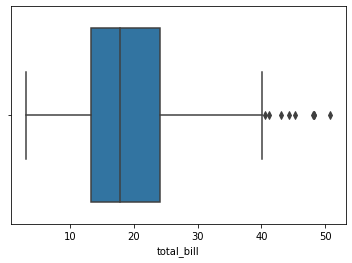

In [25]:
# Create boxplot to detect outlier
# From this boxplot, we can see that there are some outlier data on the right side (> upper limit)
sns.boxplot(data=data_tips,x=data_tips['total_bill'])

In [26]:
# To reduce the effect of outliers in a dataset, we can do log transformation
data_tips['total_bill'] = np.log(data_tips['total_bill']+1)
data_tips

,total_bill,tip,sex,smoker,day,time,size
0,2.889816,1.01,Female,No,Sun,Dinner,2
1,2.428336,1.66,Male,No,Sun,Dinner,3
2,3.091497,3.50,Male,No,Sun,Dinner,3
3,3.205993,3.31,Male,No,Sun,Dinner,2
4,3.242202,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,3.402197,5.92,Male,No,Sat,Dinner,3
240,3.338613,2.00,Female,Yes,Sat,Dinner,2
241,3.164208,2.00,Male,Yes,Sat,Dinner,2
242,2.934920,1.75,Male,No,Sat,Dinner,2


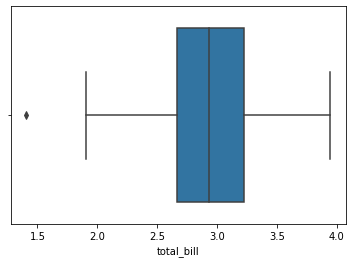

In [27]:
# Create the boxplot to detect outlier after log transformation
# From this boxplot, we can see that there is an outlier data on the left side (< below limit) and the amount of outlier data has decreased
sns.boxplot(data=data_tips,x=data_tips['total_bill'])

In [31]:
# Remove outlier data using IQR method
# one outlier data has been removed
Q1  =  data_tips['total_bill'].quantile(0.25)
Q3  =  data_tips['total_bill'].quantile(0.75)
IQR =  Q3-Q1
print("Q1 \t\t : ", Q1)
print("Q3 \t\t : ",Q3)
print("IQR \t\t : ",IQR)
Lower_Whisker = Q1 - (1.5 * IQR)
Upper_Whisker = Q3 + (1.5 * IQR)
print("Lower Whisker  \t : ", Lower_Whisker)
print("Upper Whisker  \t : ", Upper_Whisker)
filtered_tips = (( data_tips['total_bill'] >= Lower_Whisker) & (data_tips['total_bill'] <= Upper_Whisker))
data_tips1 = data_tips[filtered_tips]
print('Jumlah baris sebelum handling outlier \t:', len(data_tips))
print(f'Jumlah baris setelah memfilter outlier \t:', len(data_tips1))
data_tips1.head()

Q1 		 :  2.6635720142960597
Q3 		 :  3.2239575171735657
IQR 		 :  0.560385502877506
Lower Whisker  	 :  1.8229937599798007
Upper Whisker  	 :  4.064535771489824
Jumlah baris sebelum handling outlier 	: 244
Jumlah baris setelah memfilter outlier 	: 243


,total_bill,tip,sex,smoker,day,time,size
0,2.889816,1.01,Female,No,Sun,Dinner,2
1,2.428336,1.66,Male,No,Sun,Dinner,3
2,3.091497,3.50,Male,No,Sun,Dinner,3
3,3.205993,3.31,Male,No,Sun,Dinner,2
4,3.242202,3.61,Female,No,Sun,Dinner,4


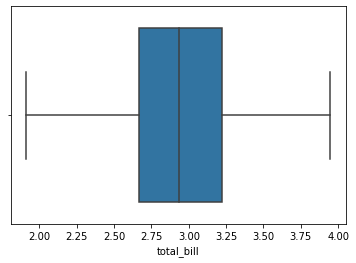

In [29]:
# Create the boxplot to final check
# There is no outlier data
sns.boxplot(data=data_tips1,x=data_tips1['total_bill'])